## Sentiment Analysis

In [1]:
import cntext as ct
import pandas as pd

In [3]:
df = pd.read_csv("C:\\D盘\\COVID-19 rumors-debunking\\biterm\\data\\data_with_topic_labels.csv")

In [4]:
df.columns

Index(['博文ID', '博文链接', '博文内容', '博文关联话题', '博文发布时间', '博文图片链接', '博文转发量', '博文评论量',
       '博文点赞量', '博主ID', '博主名称', '博主链接', '博主图像', '博主简介', '博主关注数', '博主粉丝数',
       '博主博文数', '博主性别', '博主认证信息', '原文博文ID', '原文博文链接', '原文博文内容', '原文博文关联话题',
       '原文博文发布时间', '原文博文图片链接', '原文博文转发量', '原文博文评论量', '原文博文点赞量', '原文博主ID',
       '原文博主名称', '原文博主链接', '原文博主图像', '原文博主简介', '原文博主关注数', '原文博主粉丝数', '原文博主博文数',
       '原文博主性别', '原文博主认证信息', 'pred_classify', 'cut', 'label'],
      dtype='object')

In [70]:
text = df.loc[1,'博文内容']
print(text)

当年王濛让领导辟谣，领导一声不吭，冰冷冷。//@南郭刘勃://@范雎://@李正曦Sissi:既然有视频，过年前舆论发酵时为啥不放出来？要让自己女儿承受那么大压力？真的迷。//@是Nako不是Yako:冰协为什么要任由舆论发酵，将公平公正摆在台面上一切不就迎刃而解了吗


In [71]:
ct.sentiment(text=text,
             diction=ct.load_pkl_dict('DUTIR.pkl')['DUTIR'],
             lang='chinese')

{'乐_num': 1,
 '好_num': 2,
 '怒_num': 0,
 '哀_num': 0,
 '惧_num': 0,
 '恶_num': 2,
 '惊_num': 0,
 'stopword_num': 27,
 'word_num': 81,
 'sentence_num': 5}

In [52]:
df_senti = df[['博文发布时间', '博文内容', 'label']]
df_senti['博文发布时间'] = pd.to_datetime(df_senti['博文发布时间'])
df_senti['博文发布时间'] = df_senti['博文发布时间'].dt.date
df_senti.shape

(88165, 3)

In [46]:
# 定义情绪分析函数
def analyze_sentiment(text):
    text = str(text)
    sentiment = ct.sentiment(text=text,
                             diction=ct.load_pkl_dict('DUTIR.pkl')['DUTIR'],
                             lang='chinese')
    return sentiment

In [53]:
# 对每一行的文本进行情绪分析
df_senti['情绪分析结果'] = df_senti['博文内容'].apply(analyze_sentiment)

# 将情绪分析结果的字典展开为新的列
df_result = pd.DataFrame(df_senti['情绪分析结果'].tolist())
df_result['Date'] = df_senti['博文发布时间']
df_result['label'] = df_senti['label']
df_result = df_result.drop(columns = ['stopword_num','word_num','sentence_num'])
df_result = df_result.rename(columns={'乐_num': 'Joy', '好_num': 'Good', '怒_num': 'Anger', '哀_num': 'Sad', '惧_num': 'Fear', '恶_num': 'Disgust','惊_num': 'Surprise'})
# 输出结果
df_result.shape

(88165, 9)

In [54]:
df_result.to_csv('C:\\D盘\\COVID-19 rumors-debunking\\emotion_analysis\\cntext_result.csv', encoding='utf-8-sig', index=False)

## Visualize the sentiment change over time

In [10]:
import matplotlib.pyplot as plt

In [58]:
df_result = pd.read_csv('C:\\D盘\\COVID-19 rumors-debunking\\emotion_analysis\\cntext_result.csv')

In [61]:
df_time_emotion = df_result.iloc[:, :8]
df_time_emotion

,Joy,Good,Anger,Sad,Fear,Disgust,Surprise,Date
0,0,0,0,0,0,1,0,2021-05-04
1,1,2,0,0,0,2,0,2022-02-10
2,1,0,0,0,0,4,1,2022-04-04
3,0,1,0,1,0,2,0,2022-04-10
4,2,2,0,0,0,3,0,2020-11-13
...,...,...,...,...,...,...,...,...
88160,0,0,0,0,0,1,0,2022-09-02
88161,0,0,0,0,0,2,0,2022-07-18
88162,0,0,0,0,0,7,0,2022-07-06
88163,0,1,0,0,1,6,2,2022-06-21


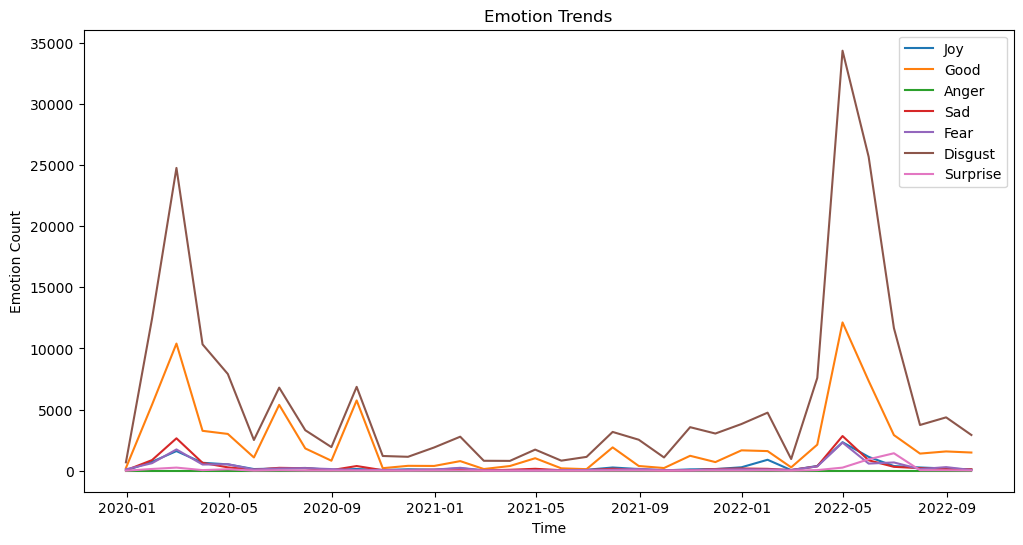

In [62]:
# 将索引转换为时间类型
df_time_emotion['Date'] = pd.to_datetime(df_time_emotion['Date'])
df_time_emotion = df_time_emotion.set_index('Date')

# 进行重采样并计数
df_resampled = df_time_emotion.resample('M').sum()

# 创建折线图
fig, ax = plt.subplots(figsize=(12, 6))
for column in df_resampled.columns:
    ax.plot(df_resampled.index, df_resampled[column], label=column)

# 设置标题、标签和图例
ax.set_title('Emotion Trends')
ax.set_xlabel('Time')
ax.set_ylabel('Emotion Count')
ax.legend()

# 显示图形
plt.show()
# 自动调整日期显示格式
fig.autofmt_xdate()

# 显示图形
plt.show()